# **Hidden Markov Models**

## **What if we have some observed variables which give us information about some hidden, underlying variables?**

---

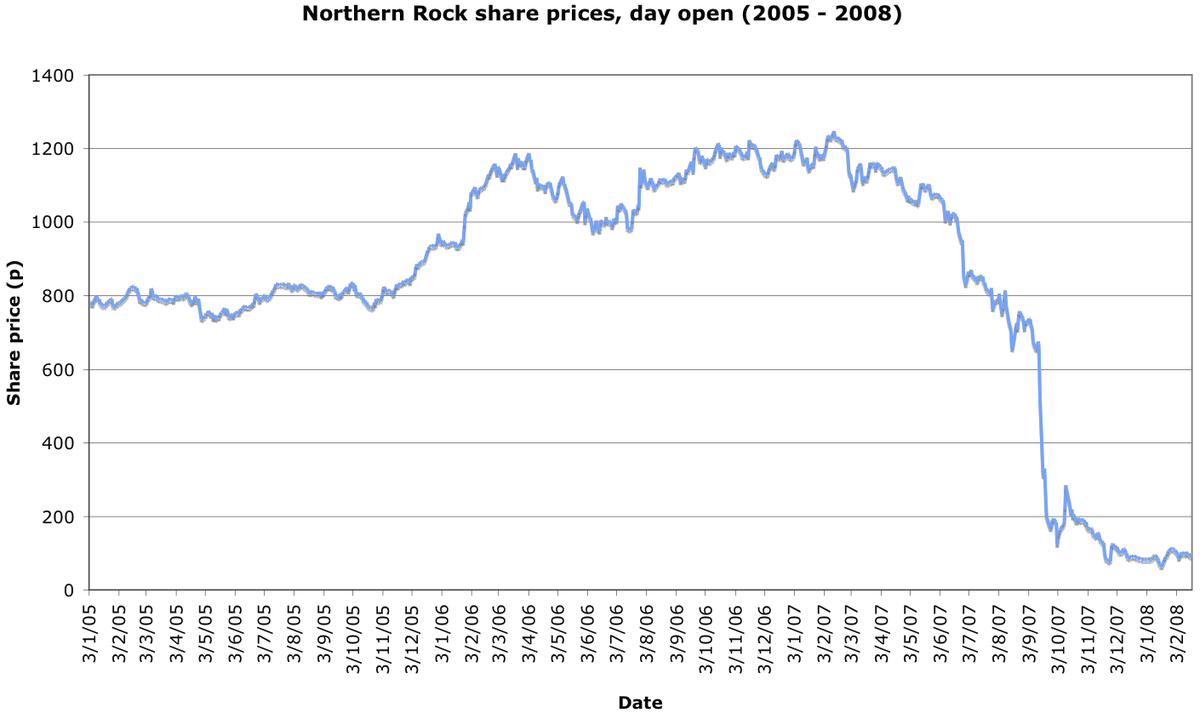

## Markov Chain

- A Markov Chain consists of states and transition probabilities

Note: All the transition probabilities leaving a state sum to 1

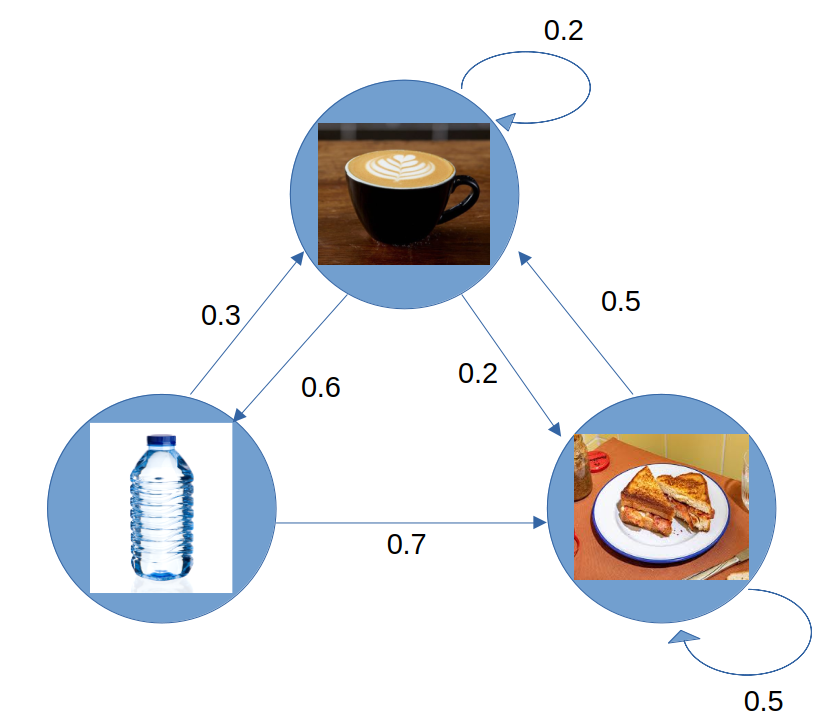

- There exists a coffee shop with only three items
- Each customer can order only one item $X_{i} = x_{i}$
- The item the next customer orders is influenced by the previous customer's item $P(X_{i+1} = x_{i+1} | X_{i} = x_{i})$ 

For example:
\begin{equation}
P(X_{2} = Coffee | X_{1} = Sandwich) = 0.5
\end{equation}

Note: We refer to Coffee, Sandwich and Water as $C,S,W$ respectively

## Markov Property

$\begin{equation}
P(X_{n+1} = x_{n+1} | X_{n} = x_{n}, X_{n-1} = x_{n-1}, \dots X_{0} = x_{0}) = P(X_{n+1} = x_{n+1} | X_{n} = x_{n}) 
\end{equation}$

- The probability of achieving some state $x_{n+1}$ is influenced only by previous state $x_{n}$ 
- Property of all Markov Processes 

## Stationary Distribution

Have three conditional probability distributions

Want to find one probability distribution which describes this Markov Chain such that $P(C) + P(W) + P(S) = 1$ - "Stationary Distribution"

### Method 1: Random Walk

Take a random walk along this Markov Chain

After $n$ steps, where $n$ is large, we can find $P(C),P(W),P(S)$

For example:
$\begin{equation}
P(C) = \frac{\text{Occurences of C}}{\text{n steps}}
\end{equation}$

$\lim_{n \to \infty} \bigg[ P(C) = \frac{\text{Occurences of C}}{\text{n steps}} \bigg]$

As $n$ tends to infinity, the probabillities of $C,W,S$ converge

#### Drawbacks

- Computationally inefficient to model
- Only provides an approximation

### Method 2: Transition Matrix

#### Method 2a: Iterative Matrix Multiplication

- Transition Matrix / Adjacency Matrix

$ \begin{bmatrix}
 & C & W & S \\
C & 0.2 & 0.6 & 0.2 \\
W & 0.3 & 0 & 0.7 \\
S & 0.5 & 0 & 0.5 
\end{bmatrix}  $

- Describes the transition probabilities in the Markov Chain

$ A = \begin{bmatrix}
0.2 & 0.6 & 0.2 \\
0.3 & 0 & 0.7 \\
0.5 & 0 & 0.5 
\end{bmatrix}  $

$\pi_{0}$ referring to the first state

$\pi_{0} = \begin{bmatrix}
0 & 1 & 0 
\end{bmatrix}$

Performing $\pi_{0}A$ we get $\pi_{1}$

$\begin{bmatrix}
0 & 1 & 0 
\end{bmatrix}
\begin{bmatrix}
0.2 & 0.6 & 0.2 \\
0.3 & 0 & 0.7 \\
0.5 & 0 & 0.5 
\end{bmatrix} = \begin{bmatrix}
0.3 & 0 & 0.7 
\end{bmatrix}  $

This is the transition probabilities from state $W$

$\begin{align}
\pi_{1}A &= \pi_{2} \\
\pi_{2}A &= \pi_{3} \\
\dots \\
\pi_{n-1}A &= \pi_{n}
\end{align}$

where $\pi_{n-1} = \pi_{n}$

##### Drawbacks

- Slightly less computationally inefficient to model
- Only provides an approximation

#### Method 2b: Simultaneous Equations

$\begin{align}
\pi A &= \pi \\
\pi A - \pi &= 0 \\
\pi (A - I) &= 0 \\
\end{align}$

$\begin{bmatrix}
\pi_1 & \pi_2 & \pi_3 
\end{bmatrix}
\begin{bmatrix}
-0.8 & 0.6 & 0.2 \\
0.3 & -1 & 0.7 \\
0.5 & 0 & -0.5 
\end{bmatrix} = 0 $

$
\begin{align}
-0.8 \pi_1 + 0.3 \pi_2 + 0.5 \pi_3 &= 0 \\
0.6 \pi_1 - \pi_2 &= 0 \\
0.2 \pi_1 + 0.7 \pi_2 - 0.5 \pi_3 &= 0
\end{align}
$

$
\begin{bmatrix}
\pi_1 & \pi_2 & \pi_3 \\ 
\end{bmatrix} = 
\begin{bmatrix}
\frac{25}{71} & \frac{15}{71} & \frac{31}{71} 
\end{bmatrix}
$

#### Method 2c: Linear Algebra

We have the constraint $P(C) + P(W) + P(S) = 1$ and we will rewrite this as $\pi_1 + \pi_2 + \pi_3 = 1$ to refer to the elements of $\pi$

$\begin{align}
\pi &= \pi A \\
\pi - \pi A &= 0 \\
\pi (I - A) &= 0 \\
(I - A)^{T} \pi^{T} &= 0 \\ 
\end{align}$

$
(I - A)^{T} = \begin{bmatrix}
0.8 & -0.3 & -0.5 \\
-0.6 & 1 & 0 \\
-0.2 & -0.7 & 0.5 &= 0
\end{bmatrix}
$

We need to add the $\sum \pi_i = 1$ constraint so we create a new matrix P with this row added

$
P = \begin{bmatrix}
0.8 & -0.3 & -0.5 \\
-0.6 & 1 & 0 \\
-0.2 & -0.7 & 0.5 \\
1 & 1 & 1
\end{bmatrix}
$

This matrix is over-determined

$
P = \begin{bmatrix}
1 & 1 & 1 \\
-0.6 & 1 & 0 \\
-0.2 & -0.7 & 0.5 
\end{bmatrix}
$

So we have

$
\begin{bmatrix}
1 & 1 & 1 \\
-0.6 & 1 & 0 \\
-0.2 & -0.7 & 0.5 
\end{bmatrix}
\begin{bmatrix}
\pi_1 \\
\pi_2 \\
\pi_3 
\end{bmatrix} = 
\begin{bmatrix}
1 \\
0 \\
0 
\end{bmatrix}
$

Left-mulitplying by $P^{-1}$

$
\begin{bmatrix}
\pi_1 \\
\pi_2 \\
\pi_3 
\end{bmatrix} =
\begin{bmatrix}
\frac{25}{71} & -\frac{60}{71} & -\frac{50}{71} \\
\frac{15}{71} & \frac{35}{71} & -\frac{30}{71} \\
\frac{31}{71} & \frac{25}{71} & \frac{80}{71} 
\end{bmatrix}
\begin{bmatrix}
1 \\
0 \\
0 
\end{bmatrix}
$

So
$
\begin{bmatrix}
\pi_1 \\
\pi_2 \\
\pi_3 
\end{bmatrix} = 
\begin{bmatrix}
\frac{25}{71} \\
\frac{15}{71} \\
\frac{31}{71} 
\end{bmatrix}
$

# Finding the Stationary Distribution - **CODING**

## Random walk

In [1]:
import numpy as np
import matplotlib.pyplot as plt

state = {
    0 : "Coffee",
    1 : "Water",
    2 : "Sandwich"
}
state

{0: 'Coffee', 1: 'Water', 2: 'Sandwich'}

Remember that $A_{ij} = P(X_n = j | X_n-1 = i)$ in our transition matrix

In [2]:
A = np.array([[0.2, 0.6, 0.2], [0.3, 0.0, 0.7], [0.5, 0.0, 0.5]])
A

array([[0.2, 0.6, 0.2],
       [0.3, 0. , 0.7],
       [0.5, 0. , 0.5]])

In [3]:
start_state = 0
curr_state = start_state
print(state[curr_state], "--->", end=" ")

for i in range(0, 20):
    curr_state = np.random.choice([0, 1, 2], p=A[curr_state])
    print(state[curr_state], "--->", end=" ")
print("end")

Coffee ---> Water ---> Sandwich ---> Coffee ---> Sandwich ---> Coffee ---> Water ---> Sandwich ---> Coffee ---> Water ---> Sandwich ---> Coffee ---> Water ---> Sandwich ---> Sandwich ---> Sandwich ---> Coffee ---> Coffee ---> Water ---> Coffee ---> Water ---> end


In [4]:
start_state = 0
curr_state = start_state
count = np.array([0, 0, 0])
count[start_state] = 1
count

array([1, 0, 0])

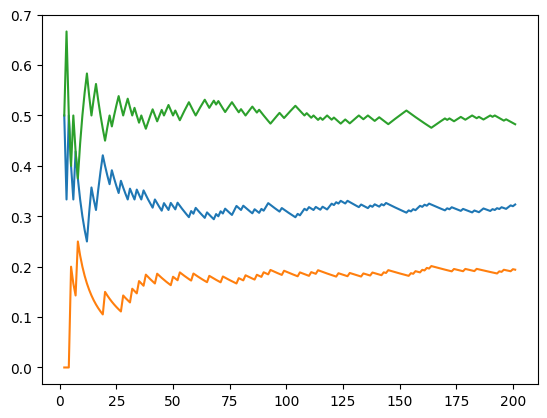

π =  0.32338308457711445 0.19402985074626866 0.48258706467661694


In [5]:
C = []
W = []
S = []
Y = []

for i in range(0, 200):
    curr_state = np.random.choice([0,1,2], p=A[curr_state])
    count[curr_state] += 1
    if i % 1**2 == 0:
        C.append(count[0]/np.sum(count))
        W.append(count[1]/np.sum(count))
        S.append(count[2]/np.sum(count))
        Y.append(np.sum(count))

plt.plot(Y, C, Y, W, Y, S)
plt.show()
print("π = ", C[-1], W[-1], S[-1])

## Iterative Matrix Multiplication

In [6]:
pi = [1, 0, 0]

for i in range(0, 10):
    pi =  np.matmul(pi, A)
    print("π = ", pi)

π =  [0.2 0.6 0.2]
π =  [0.32 0.12 0.56]
π =  [0.38  0.192 0.428]
π =  [0.3476 0.228  0.4244]
π =  [0.35012 0.20856 0.44132]
π =  [0.353252 0.210072 0.436676]
π =  [0.35201   0.2119512 0.4360388]
π =  [0.35200676 0.211206   0.43678724]
π =  [0.35215677 0.21120406 0.43663917]
π =  [0.35211216 0.21129406 0.43659378]


In [20]:
P = np.array([
    [1, 1, 1],
    [-0.6, 1, 0],
    [-0.2, -0.7, 0.5]
])

b = np.array([1, 0, 0])

pi = np.linalg.inv(P).dot(b)

pi

array([0.35211268, 0.21126761, 0.43661972])

# Markovian Harry Potter

## Imports

In [7]:
import re
from nltk.tokenize import word_tokenize
import random
import nltk

## Reading The Chamber of Secrets

In [8]:
path = "kaggle/input/harry_potter/02 Harry Potter and the Chamber of Secrets.txt"

def read_story(path):
    txt = []

    with open(path) as f:
        for line in f:
            line = line.strip()
            if line!='':txt.append(line)
    
    return txt

story = read_story(path)
print("number of lines = ", len(story))

number of lines =  3216


## Cleaning the text

In [9]:
def clean_txt(txt):
    cleaned_txt = []
    for line in txt:
        line = line.lower()
        line = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-\\]", "", line)
        tokens = word_tokenize(line)
        words = [word for word in tokens if word.isalpha()]
        cleaned_txt += words
    return cleaned_txt

cleaned_story = clean_txt(story)
print("number of words = ", len(cleaned_story))

number of words =  87271


## Creating the Markov Model

In [10]:
def make_markov_model(cleaned_story, n_gram=2):
    markov_model = {}
    for i in range(len(cleaned_story)-n_gram-1):
        curr_state, next_state = "", ""
        for j in range(n_gram):
            curr_state += cleaned_story[i+j] + " "
            next_state += cleaned_story[i+j+n_gram] + " "
        curr_state = curr_state[:-1]
        next_state = next_state[:-1]
        if curr_state not in markov_model:
            markov_model[curr_state] = {}
            markov_model[curr_state][next_state] = 1
        else:
            if next_state in markov_model[curr_state]:
                markov_model[curr_state][next_state] += 1
            else:
                markov_model[curr_state][next_state] = 1
    
    # calculating transition probabilities
    for curr_state, transition in markov_model.items():
        total = sum(transition.values())
        for state, count in transition.items():
            markov_model[curr_state][state] = count/total
        
    return markov_model

In [11]:
markov_model = make_markov_model(cleaned_story)

In [12]:
print("number of states = ", len(markov_model.keys()))

number of states =  45475


In [13]:
print("All possible transitions from 'chamber of' state: \n")
print(markov_model['chamber of'])

All possible transitions from 'chamber of' state: 

{'secrets chapter': 0.22807017543859648, 'secrets has': 0.05263157894736842, 'secrets what': 0.017543859649122806, 'secrets said': 0.07017543859649122, 'you all': 0.017543859649122806, 'secrets the': 0.017543859649122806, 'secrets so': 0.017543859649122806, 'secrets unleash': 0.017543859649122806, 'secrets ron': 0.017543859649122806, 'secrets for': 0.05263157894736842, 'secrets is': 0.07017543859649122, 'secrets harry': 0.03508771929824561, 'secrets was': 0.03508771929824561, 'secrets with': 0.017543859649122806, 'secrets his': 0.017543859649122806, 'secrets in': 0.017543859649122806, 'secrets fifty': 0.017543859649122806, 'secrets and': 0.05263157894736842, 'secrets closed': 0.017543859649122806, 'secrets they': 0.017543859649122806, 'secrets all': 0.017543859649122806, 'secrets out': 0.017543859649122806, 'secrets have': 0.017543859649122806, 'secrets he': 0.017543859649122806, 'secrets itself': 0.017543859649122806, 'secrets that':

## Text Generation

In [14]:
def generate(markov_model, limit=100, start='chamber of'):
    n = 0
    curr_state = start
    next_state = None
    story = ""
    story += curr_state + " "
    while n < limit:
        next_state = random.choices(list(markov_model[curr_state].keys()),
                                    list(markov_model[curr_state].values()))
        
        curr_state = next_state[0]
        story += curr_state + " "
        n += 1
    return story

In [15]:
for i in range(20):
    print(str(i+1)+". ", generate(markov_model, start="harry potter", limit=15))

1.  harry potter fan club when the next time he turned to squint at what he d almost be glad of a sight of his shaggy black head grazing the ceiling but enchanted 
2.  harry potter was safe and never did dobby dream that harry potter said malfoy luckily they didn t seem to be missing him at that moment uncle vernon s company made drills 
3.  harry potter and the great hall innumerable candles were hovering in midair to dodge the bludger at the top of the red envelope which harry realized that he couldn t control himself 
4.  harry potter and the most exciting thing that s ever happened to be snape s least favorite student kept flicking eyes at ron and hermione used their time off to your dormitories 
5.  harry potter is humble and modest said dobby reverently his eyes aglow harry potter came back to him was another attack today and i have been twenty feet above her stopping the 
6.  harry potter go home harry potter met the dark lord before he d stopped enjoying the ride it was over al

In [16]:
for i in range(20):
    print(str(i+1)+". ", generate(markov_model, start="hermione granger", limit=15))

1.  hermione granger and i can t dobby mustn t tell her what i said no arthur no the crowd stampeded backward knocking more shelves over gentlemen please please cried the assistant and 
2.  hermione granger i would urge anyone who thinks they might know anything about his part in this dangerous adventure dumbledore added why so modest gilderoy harry gave a huge jump and a 
3.  hermione granger standing at the top ron had said he hadn t noticed anything harry could see the eyes said harry somewhere there said hermione standing up and to his feet all 
4.  hermione granger knew my secret ambition is to repeat itself now that riddle has vanished from the book to press his eye with his wand lockhart slid his legs into the pipe 
5.  hermione granger always top in everything hermione beamed as she spoke making it draw in the candlelight why go up to the staff room a student properly before however the door of 
6.  hermione granger always top in everything hermione beamed as she landed on his 

In [17]:
for i in range(20):
    print(str(i+1)+". ", generate(markov_model, start="ron weasley", limit=15))

1.  ron weasley and hermione as they hurtled around the corner harry looked at him as he shrank they crashed up the steps to the present he heard something move beyond the door 
2.  ron weasley was outside harry s very mysterious past of the reason for this harry potter met the sly old dog professor flitwick buried his face was livid with terror harry didn 
3.  ron weasley and hermione professor sprout had made him stay behind to scrape tubeworms off the speed of those new nimbus two thousand which was easily the best teacher here sir snape 
4.  ron weasley and hermione came hurrying up to the it wasn t surprised to see that his photographic self was putting up a good moment to regain control of himself from the 
5.  ron weasley wasn t granger the bell rang five minutes to eight and harry still shaking started scrubbing the kitchen mantelpiece and it shouted tuck your shirt in scruffy the ghoul in 
6.  ron weasley wasn t caught soon he was young maybe it ll be down to you and then i he

In [18]:
print(generate(markov_model, start="professor dumbledore", limit=500))

professor dumbledore obviously thought he was nearly headless nick s party had been lined with candles too though the effect was far too runny but he was wrong as though someone had died harry had been attacked they went for filch first neville said his round face fearful and everyone who read sonnets of a sorcerer spoke in limericks for the rest of the fire he took a large key from her face and cowering behind his legs in the near blackness harry could see of professor mcgonagall stepped onto it harry potter very pleased to meet you ron s whole attention was fixed on the walls were covered with large lurid pink flowers worse still confetti was falling from the pale blue ceiling harry went to tip an armful of withered stalks onto the compost heap and found himself gazing into a pair of bright brown eyes staring at harry s room third time this week he roared across the table hagrid is my good friend and a good job on them that all danger had passed only to be proved wrong right away was

# Hidden Markov Models

States of the Markov Chain are hidden from us but we can observse variables that depend on these hidden states

- **Transition Matrix** - Our transition matrix is hidden
- **Emission Matrix** - Our emission matrix is the matrix of observed values

# Monte Carlo Methods
# Forward Algorithm
# Viterbi Algorithm
# Baum-Welch Algorithm
# Gaussian Mixture Models